# Custom oil/water plot

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib.patches import PathPatch

## Make fake data

In [2]:
time = pd.date_range('2018-01-01', periods=365, freq='1d')
oil = 1000 * np.random.random(len(time))
water = 100 * np.random.random(len(time))

## Plot a single track

In [3]:
def colour_fill(series, time_series, cmap='viridis', ax=None):
    """Make one colourful curve.
    """
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(2, 10))
        show = True
    else:
        show = False

    y_lims = mpl.dates.date2num(time_series)

    im = ax.imshow(series.reshape(-1, 1), aspect='auto', origin='lower',
                   extent=[series.min(), series.max(), y_lims.min(), y_lims.max()], 
                   cmap=cmap
                  )

    paths = ax.fill_betweenx(time_series, series, series.min(),
                             facecolor='none', lw=0., edgecolor='k',
                            )

    # Make 'fill' mask and clip the background image with it.
    patch = PathPatch(paths._paths[0], visible=False)
    ax.add_artist(patch)
    im.set_clip_path(patch)
    
    if show:
        plt.show()
        return
        
    return ax

/home/matt/anaconda3/envs/py37/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


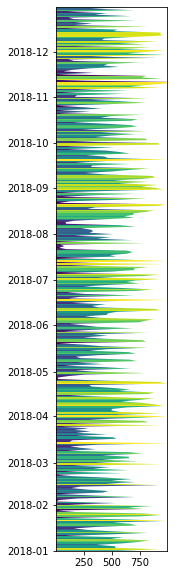

In [4]:
colour_fill(oil, time)

## Plot one well

In [5]:
def make_one_plot(well_name, oil_series, water_series, time_series, axs=None):
   
    # Convert times to num for plotting.
    

    # Set up the figure.
    if axs is None:
        fig, axs = plt.subplots(figsize=(4, 10), ncols=2, nrows=1, sharey=True)
        plt.subplots_adjust(wspace=0)
        show = True
    else:
        show = False

    # Oil plot.
    ax = axs[0]
    ax = colour_fill(oil_series, time_series, ax=ax, cmap='Reds')
    
    # Labels.
    ax.set_title('Oil')
    ax.set_xlim(1000,0)
    ax.set_ylabel('Date')
    ax.set_xlabel('value [units]')

    # Water plot.
    ax = axs[1]
    ax = colour_fill(water_series, time_series, ax=ax, cmap='Blues')

    
    # Labels etc.
    ax.set_title('Water')
    ax.set_xlim(0,100)
    ax.set_xlabel('value [units]')
    ax.invert_yaxis()
    
    if show:
        plt.show()
        return
    
    return axs

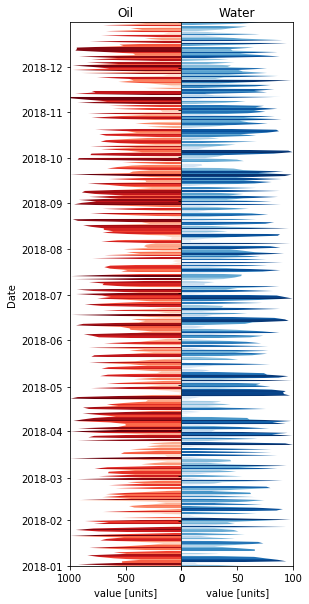

In [6]:
make_one_plot('X', oil, water, time)

### Now let's make two plots.

In [7]:
wells = {
    'well1': {'oil': 1000 * np.random.random(len(time)),
              'water': 100 * np.random.random(len(time)),
             },
    'well2': {'oil': 1000 * np.random.random(len(time)),
              'water': 100 * np.random.random(len(time)),
             },    
    'well3': {'oil': 1000 * np.random.random(len(time)),
              'water': 100 * np.random.random(len(time)),
             },    
    'well4': {'oil': 1000 * np.random.random(len(time)),
              'water': 100 * np.random.random(len(time)),
             },    
}

In [8]:
import matplotlib.gridspec as gridspec


def plot_multiple_wells(wells, time, fname=None):
    """Expecting `wells` as a dictionary, see example.
    """
    y_lims = mpl.dates.date2num(time)

    fig = plt.figure(figsize=(4*len(wells), 10),
                     constrained_layout=False
                    )

    margin = 0.075
    width = 0.75 / len(wells) - margin/2
    lefts = np.linspace(0+margin, 1-width-(margin/2), len(wells))
    rights = lefts + width

    for left, right, (well, data) in zip(lefts, rights, wells.items()):
        for d in data:

            gs_well = gridspec.GridSpec(1, 2)
            ax0 = fig.add_subplot(gs_well[0,0])
            ax1 = fig.add_subplot(gs_well[0,1])

            # Adjust spacing.
            gs_well.update(wspace=0)
            gs_well.update(left=left)
            gs_well.update(right=right)

            # Oil plot for this well.
            ax = ax0
            ax = colour_fill(data['oil'], time, ax=ax, cmap='Reds')
            ax.set_title('Oil')
            ax.set_xlim(1000,0)
            ax.set_ylabel('Date')
            ax.set_xlabel('value [units]')

            # Water plot.
            ax = ax1
            ax = colour_fill(data['water'], time, ax=ax, cmap='Blues')
            ax.set_title('Water')
            ax.set_xlim(0,100)
            ax.set_xlabel('value [units]')
            ax.invert_yaxis()
            ax.axes.get_yaxis().set_visible(False)

        plt.text(0, 1.05, well,
                 ha='center', va='bottom',
                 transform=ax.transAxes,
                 size=20
                )

    if fname is not None:
        plt.savefig(fname)

    plt.show()

    return

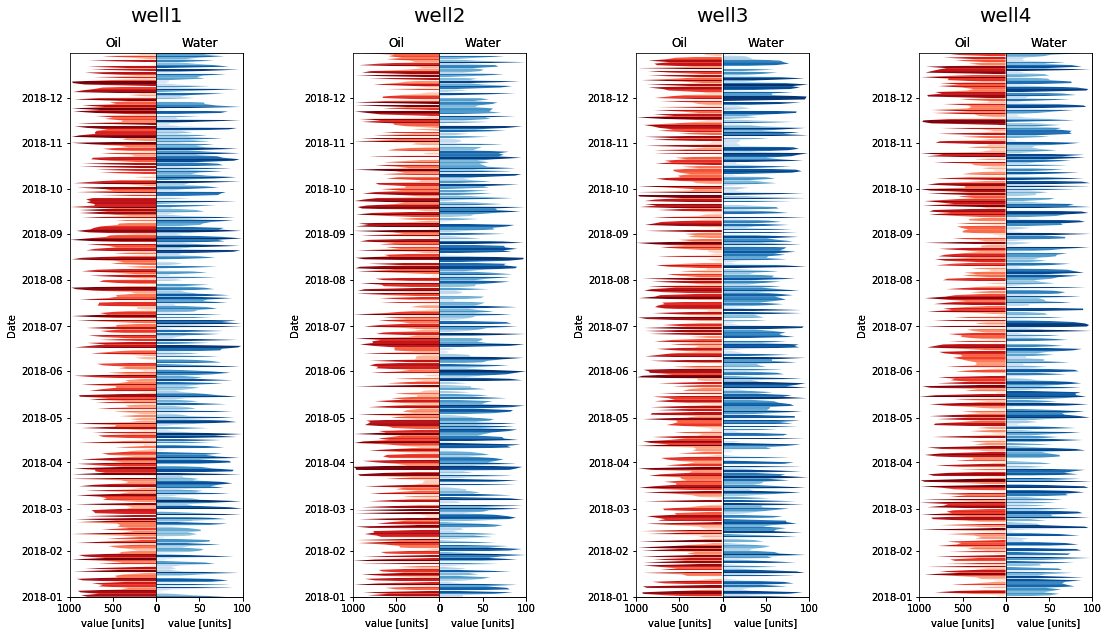

In [9]:
plot_multiple_wells(wells, time, 'test.png')